# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

## Pra-pemrosesan

In [3]:
# Muat semua library

import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

### Memuat Data

In [4]:
# Muat file data menjadi DataFrame

df= pd.read_csv('vehicles_us.csv')


### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan 
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [5]:
# memberikan tampilan informasi mengenai data yang akan disampaikan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
# Memperlihatkan distribusi data berdasarkan standard analisis

df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


[Deskripsikan apa yang Anda lihat pada informasi umum dan sampel data yang ditampilkan. Apakah terdapat masalah yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut?]

In [5]:
# Memperlihatkan gambaran singkat akan pendistribusian value di dataset  yang akan di analisis

df.sample(frac=0.4)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
35857,9000,2009.0,honda pilot,excellent,6.0,gas,173000.0,automatic,SUV,brown,1.0,2019-01-18,99
16317,3750,2007.0,nissan altima,excellent,4.0,gas,153000.0,automatic,sedan,black,NaN,2019-03-16,6
3964,3500,2006.0,toyota prius,excellent,4.0,hybrid,169000.0,automatic,sedan,grey,NaN,2018-12-29,3
47603,10995,2014.0,ford fusion se,excellent,4.0,gas,78476.0,automatic,sedan,NaN,NaN,2019-04-09,7
1419,8950,2008.0,toyota prius,excellent,4.0,hybrid,76113.0,automatic,hatchback,NaN,NaN,2019-02-18,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50686,14700,2012.0,ford f-150,excellent,NaN,gas,139000.0,automatic,pickup,NaN,1.0,2018-10-02,25
96,24600,2013.0,ford mustang gt coupe 2d,good,8.0,gas,22474.0,other,coupe,white,NaN,2018-10-28,22
5266,999,1998.0,toyota corolla,good,4.0,gas,201000.0,automatic,sedan,blue,NaN,2018-07-14,51
51349,9499,2015.0,nissan altima,excellent,4.0,gas,91870.0,automatic,sedan,brown,NaN,2019-03-22,16


*Jika melakukan sampling dengan beberapa kali menggunakan perintah (frac=) Bisa di lihat ada keganjian di kolom 
1. Odomater 
2. Paintolor
3. cylinders

- ada nilai nan yang tidak di inginkan

- Mobil tertua yang diposting di web adalah tahun 1908 dan yang termuda adalah 2019.

- Nilai mean, median, dan max pada kolom price terlalu jauh (variance 30%), mengindikasikan adanya data outlier, begitu pula dengan kolom days_listed.

- Kolom is_4wd merupakan nilai Boolean, kita perlu mengisi kolom yang hilang menjadi False, karena kita berasumsi bahwa yang tidak terisi merupakan kendaraan yang tidak memiliki penggerak 4 roda.

### Eksplorasi dataset

- Hal ini di lakukan untuk mengetahi kualitas data yang di dapat untuk di analysis

In [6]:
# Mencari nilai yang hilang di berbagai kolom 

df.isna().sum() / len(df) * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [8]:
df['paint_color'].describe()

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

**terdapat nilai yang hilang di 5 kolom, hal ini di dasari adanya persebaran data yang kosong dan hari di tinjau kembali. langkah tepat selanjutnya adalah mengatasi nilai nilai yang hilang.**

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

In [9]:
# Membuat satuan table untuk mempermudah proses pembersihan nilai
df_null = df.loc[(df['model_year'].isna()) | (df['cylinders'].isna()) | 
                (df['odometer'].isna()) | (df['paint_color'].isna()) 
                 | (df['is_4wd'].isna())] 
df_null

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [10]:
# cek model_year untuk dapat mempermudah melihat value yang tersebar di dataset

df[df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [11]:
# cek distribusi yang mudah di kolom dataset
df['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

In [12]:
# Melihat distribusi value dari kolom model_year

df['model_year'].describe() 

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [14]:
# Melakukan pergantian terhadap nilai nilai yang hilang dengan metode mengisi dengan nilai median

df['model_year'] = df['model_year'].fillna(df['model_year'].median())

In [15]:
# Pengecekan terhadap nilai yang hilang 
df['model_year'].isna().sum()

0

## Pergantian tipe data dibutuhkan untuk dapat mempermudah proses pengolahan data

In [16]:
# Perubahan tipe data
df['model_year'] = df['model_year'].astype(int)

In [17]:
#memperbaiki nilai yang hilang pada kolom 'cylinders'
#melihat distribusi pada kolom cylinders
df['cylinders'].describe()


count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [18]:
#mengganti nilai yang hilang dengan median
df.loc[df['cylinders'].isna() , 'cylinders'] = df['cylinders'].median()

In [19]:
#cek kembali apakah masih ada nilai yang hilang
df['cylinders'].isna().sum()

0

In [20]:
#mengganti tipe data cylinders ke integer
df['cylinders'] = df['cylinders'].astype(int)

In [21]:
# cek pendistribusian value di kolom odomater
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

**Kolom edomater memiliki outlier yang bagusnya diisi dengan median**

In [22]:
# Mengubah nilai yang hilang pada kolom odomater
df.loc[df['odometer'].isna() , 'odometer'] = df['odometer'].median()

In [23]:
# cek kolom odomater apakah nilai - nilai yang di inginkan sudah kembali lagi atau tidak
df['odometer'].isna().sum()

0

In [24]:
rules = df['cylinders'].unique()

def data_imputation(df, column_filter, column_selected, column_target, rules): #paramater
    df[column_target] = df[column_selected]
    for rule in rules:
        # get median
        median = df.loc[(df[column_filter]==rule) & ~(df[column_target].isna()), column_target].median()
        # change missing value
        df.loc[(df[column_filter]==rule) & (df[column_target].isna()), column_target] = median
    return df
 

In [25]:
data_imputation(df, column_filter='model_year', column_selected='cylinders',column_target='odometer', rules=rules)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,6.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,6.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,4.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,8.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,4.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,6.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,4.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,4.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013,toyota corolla,good,4,gas,4.0,automatic,sedan,black,NaN,2018-07-02,71


In [28]:
rules = df['odometer'].unique()

def data_imputation(df, column_filter, column_selected, column_target, rules): #paramater
    df[column_target] = df[column_selected]
    for rule in rules:
        # Mendapatkan value median 
        median = df.loc[(df[column_filter]==rule) & ~(df[column_target].isna()), column_target].median()
        # Mengganti missing value
        df.loc[(df[column_filter]==rule) & (df[column_target].isna()), column_target] = median
    return df

In [29]:
data_imputation(df, column_filter='condition', column_selected='cylinders',column_target='odometer', rules=rules)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,6.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,6.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,4.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,8.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,4.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,6.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,4.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,4.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013,toyota corolla,good,4,gas,4.0,automatic,sedan,black,NaN,2018-07-02,71


In [30]:
#Kolom paint colour di lihat value nya untuk mengetahui berbagai macam value nya
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [31]:
# Pergantian nilai yang berguna untuk pemprosesan data selain string
df.loc[df['paint_color'].isna() , 'paint_color'] = 'others'

In [32]:
#cek di kolom paint_colour apakah ada value selain 'others'
df['paint_color'].isna().sum()


0

In [33]:
# pengecekan di lakukan untuk melihat pergantian value apakah sudah sesuai dengan yang di harapkan
df['paint_color'].value_counts()

white     10029
others     9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [34]:
# Melakukan pengecekan terhadap kolom is_4wd untuk apakah harus ada pergantian yang harus di lakukan 
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [35]:
#Mengganti nilai yang hilang dpada kolom dimana nilai sebagaian besar float
df['is_4wd'].fillna(0, inplace=True)

In [36]:
#Penambahan di lakukan untuk dapat memberikan kategori boolean 
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [37]:
#Mengubah tipe data menjadi integer di kolom bolean untuk mempermudah mencari value dari dataset
df['is_4wd'] = df['is_4wd'].astype(int)

In [38]:
# cek lagi apakah ada nilai duplikat
df.duplicated().sum()

0

## Memperbaiki Tipe Data

[Karena data kurang lebih telah lengkap, maka perbaiki tipe datanya jika dibutuhkan.]

In [39]:
# Mensejajarkan format pada kolom date_posted
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [40]:
# Supaya dapat memberikan kemudahan dalam melihat kapan iklan ketika di tayangkan 
df['days_listed'] = pd.to_timedelta(df['days_listed'], unit='D')

In [41]:
#memastikan kembali tipe data-nya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   price         51525 non-null  int64          
 1   model_year    51525 non-null  int64          
 2   model         51525 non-null  object         
 3   condition     51525 non-null  object         
 4   cylinders     51525 non-null  int64          
 5   fuel          51525 non-null  object         
 6   odometer      51525 non-null  float64        
 7   transmission  51525 non-null  object         
 8   type          51525 non-null  object         
 9   paint_color   51525 non-null  object         
 10  is_4wd        51525 non-null  int64          
 11  date_posted   51525 non-null  datetime64[ns] 
 12  days_listed   51525 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(6), timedelta64[ns](1)
memory usage: 5.1+ MB


In [45]:
df['cylinders'] = df['cylinders'].astype(int)

In [46]:
df['is_4wd'] = df['is_4wd'].astype(int)

In [47]:
df['model_year'] = df['model_year'].astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   price         51525 non-null  int64          
 1   model_year    51525 non-null  int64          
 2   model         51525 non-null  object         
 3   condition     51525 non-null  object         
 4   cylinders     51525 non-null  int64          
 5   fuel          51525 non-null  object         
 6   odometer      51525 non-null  float64        
 7   transmission  51525 non-null  object         
 8   type          51525 non-null  object         
 9   paint_color   51525 non-null  object         
 10  is_4wd        51525 non-null  int64          
 11  date_posted   51525 non-null  datetime64[ns] 
 12  days_listed   51525 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(6), timedelta64[ns](1)
memory usage: 5.1+ MB


## Memperbaiki Kualitas Data

In [49]:
# Menambahkan waktu dan tanggal pada waktu di jalankannya iklan

# Penambahan kolom untuk mendapatkan value yang bisa di jadikan variable 
df['days'] = df['date_posted'].dt.dayofweek
df['months'] = df['date_posted'].dt.month
df['years'] = df['date_posted'].dt.year

# 
df['last_listed'] = df['date_posted'] + df['days_listed']

In [50]:
# Melihat dataset dengan kolom terbaru
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,months,years,last_listed
0,9400,2011,bmw x5,good,6,gas,6.0,automatic,SUV,others,1,2018-06-23,19 days,5,6,2018,2018-07-12
1,25500,2011,ford f-150,good,6,gas,6.0,automatic,pickup,white,1,2018-10-19,50 days,4,10,2018,2018-12-08
2,5500,2013,hyundai sonata,like new,4,gas,4.0,automatic,sedan,red,0,2019-02-07,79 days,3,2,2019,2019-04-27
3,1500,2003,ford f-150,fair,8,gas,8.0,automatic,pickup,others,0,2019-03-22,9 days,4,3,2019,2019-03-31
4,14900,2017,chrysler 200,excellent,4,gas,4.0,automatic,sedan,black,0,2019-04-02,28 days,1,4,2019,2019-04-30


In [51]:
# Memberikan tambahan kolom usia kendaraan 
df['age_of_car'] = df['years'] - df['model_year'] + 1
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,months,years,last_listed,age_of_car
0,9400,2011,bmw x5,good,6,gas,6.0,automatic,SUV,others,1,2018-06-23,19 days,5,6,2018,2018-07-12,8
1,25500,2011,ford f-150,good,6,gas,6.0,automatic,pickup,white,1,2018-10-19,50 days,4,10,2018,2018-12-08,8
2,5500,2013,hyundai sonata,like new,4,gas,4.0,automatic,sedan,red,0,2019-02-07,79 days,3,2,2019,2019-04-27,7
3,1500,2003,ford f-150,fair,8,gas,8.0,automatic,pickup,others,0,2019-03-22,9 days,4,3,2019,2019-03-31,17
4,14900,2017,chrysler 200,excellent,4,gas,4.0,automatic,sedan,black,0,2019-04-02,28 days,1,4,2019,2019-04-30,3


In [59]:
df['age_of_car'].unique()

array([  8,   7,  17,   3,   5,   4,  12,   2,  11,   6,   9,   1,  16,
        15,  10,  14,  18,  13,  54,  25,  19,  20,  27,  23,  39,  21,
        24,  45,  22,  26,  34,  43,  32,  44,  30,  29,  47,  53,  50,
        31,  41,  55,  40,  51,  28,  33,  56,  38,  57,  35,  46,  42,
        52,  64,  48,  49,  37,  36,  66,  58,  72,  59,  60, 111,  83,
        70,  61,  90])

In [69]:
sorted(df['age_of_car'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 64,
 66,
 70,
 72,
 83,
 90,
 111]

In [70]:
# Menambahkan kolom untuk memperliharkan jarak tempuh avg_miles untuk menambah variable hipotesis

df['avg_miles'] = df['odometer'] / df['age_of_car']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,months,years,last_listed,age_of_car,avg_miles,scale_of_condition
0,9400,2011,bmw x5,good,6,gas,6.0,automatic,SUV,others,1,2018-06-23,19 days,5,6,2018,2018-07-12,8,0.750000,4
1,25500,2011,ford f-150,good,6,gas,6.0,automatic,pickup,white,1,2018-10-19,50 days,4,10,2018,2018-12-08,8,0.750000,4
2,5500,2013,hyundai sonata,like new,4,gas,4.0,automatic,sedan,red,0,2019-02-07,79 days,3,2,2019,2019-04-27,7,0.571429,3
3,1500,2003,ford f-150,fair,8,gas,8.0,automatic,pickup,others,0,2019-03-22,9 days,4,3,2019,2019-03-31,17,0.470588,2
4,14900,2017,chrysler 200,excellent,4,gas,4.0,automatic,sedan,black,0,2019-04-02,28 days,1,4,2019,2019-04-30,3,1.333333,5


In [71]:
# Merubah nilai 0 menjadi 1 berguna untuk memberikan analysis dimana perhitungan menjadi dapat mudah di mengerti seperti melakukan klasifikasi 
 
df.loc[df['age_of_car'] == 0, 'age_of_car'] = 1


In [72]:
# Melakukan perhitungan jarak rata rata pertahun dengan kolom spesifik

df['avg_miles'] = df['odometer'] / df['age_of_car']

In [73]:
# Mengecek lagi variable yang ada dari kolom secara spesifik
df['avg_miles'].describe()

count    51525.000000
mean         1.103162
std          1.295621
min          0.072072
25%          0.461538
50%          0.666667
75%          1.142857
max         10.000000
Name: avg_miles, dtype: float64

In [74]:
# Melakukan pengecekan terhadap kolom 'condition' untuk melihat value yang sudah ada

df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [75]:
# Dengan menggunakan pengklasifikasian manipulasi untuk analysis akan menjadi lebih akurat untuk bisa memberikan hipotesis lebih lanjut di Dataset
condition_categoric = df['condition']

def scale_of_condition (condition_categoric):
    if condition_categoric == 'excellent':
        return 5
    elif condition_categoric == 'good':
        return 4
    elif condition_categoric == 'like new':
        return 3
    elif condition_categoric == 'fair':
        return 2
    elif condition_categoric == 'new':
        return 1
    else:
        return 0


In [76]:
# Memberikan kolom tambahan untuk dijadikan sebagai skala numerik

df['scale_of_condition'] = df['condition'].apply(scale_of_condition)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,months,years,last_listed,age_of_car,avg_miles,scale_of_condition
0,9400,2011,bmw x5,good,6,gas,6.0,automatic,SUV,others,1,2018-06-23,19 days,5,6,2018,2018-07-12,8,0.750000,4
1,25500,2011,ford f-150,good,6,gas,6.0,automatic,pickup,white,1,2018-10-19,50 days,4,10,2018,2018-12-08,8,0.750000,4
2,5500,2013,hyundai sonata,like new,4,gas,4.0,automatic,sedan,red,0,2019-02-07,79 days,3,2,2019,2019-04-27,7,0.571429,3
3,1500,2003,ford f-150,fair,8,gas,8.0,automatic,pickup,others,0,2019-03-22,9 days,4,3,2019,2019-03-31,17,0.470588,2
4,14900,2017,chrysler 200,excellent,4,gas,4.0,automatic,sedan,black,0,2019-04-02,28 days,1,4,2019,2019-04-30,3,1.333333,5


## Memeriksa Data yang Sudah Bersih

[Mengingat data sudah siap untuk dianalisis, mari kita lihat data Anda sekilas lagi. Sangat berguna untuk melihat apa yang sebenarnya akan Anda gunakan untuk analisis.]

In [77]:
# Melihat dataset yang sudah di perbaharui untuk melakukan analysis lebih lanjut

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   price               51525 non-null  int64          
 1   model_year          51525 non-null  int64          
 2   model               51525 non-null  object         
 3   condition           51525 non-null  object         
 4   cylinders           51525 non-null  int64          
 5   fuel                51525 non-null  object         
 6   odometer            51525 non-null  float64        
 7   transmission        51525 non-null  object         
 8   type                51525 non-null  object         
 9   paint_color         51525 non-null  object         
 10  is_4wd              51525 non-null  int64          
 11  date_posted         51525 non-null  datetime64[ns] 
 12  days_listed         51525 non-null  timedelta64[ns]
 13  days                51525 non-n

In [78]:
# Melihat distribusi variable yang tersebar di dataset setelah di perbaharui 
df.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed,days,months,years,age_of_car,avg_miles,scale_of_condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.838234,6.112450,6.112450,0.496303,39 days 13:18:51.248908297,3.005434,6.628491,2018.307462,9.469229,1.103162,4.309131
std,10040.803015,6.065836,1.573784,1.573784,0.499991,28 days 04:54:08.916817944,1.997759,3.474134,0.461447,6.079773,1.295621,0.814078
min,1.000000,1908.000000,3.000000,3.000000,0.000000,0 days 00:00:00,0.000000,1.000000,2018.000000,1.000000,0.072072,0.000000
25%,5000.000000,2007.000000,4.000000,4.000000,0.000000,19 days 00:00:00,1.000000,3.000000,2018.000000,5.000000,0.461538,4.000000
50%,9000.000000,2011.000000,6.000000,6.000000,0.000000,33 days 00:00:00,3.000000,7.000000,2018.000000,8.000000,0.666667,4.000000
75%,16839.000000,2014.000000,8.000000,8.000000,1.000000,53 days 00:00:00,5.000000,10.000000,2019.000000,13.000000,1.142857,5.000000
max,375000.000000,2019.000000,12.000000,12.000000,1.000000,271 days 00:00:00,6.000000,12.000000,2019.000000,111.000000,10.000000,5.000000


In [79]:
# melakukan sampling dataset yang sudah di perbahaui
df.sample(frac=0.5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,months,years,last_listed,age_of_car,avg_miles,scale_of_condition
42801,9999,2006,ford f250,good,8,diesel,8.0,automatic,truck,white,1,2018-12-14,30 days,4,12,2018,2019-01-13,13,0.615385,4
45203,4000,1983,chevrolet silverado,good,8,gas,8.0,automatic,truck,silver,1,2018-09-27,16 days,3,9,2018,2018-10-13,36,0.222222,4
28437,25000,2014,toyota tundra,excellent,8,gas,8.0,automatic,pickup,black,1,2019-01-17,26 days,3,1,2019,2019-02-12,6,1.333333,5
17158,12299,2018,nissan sentra,excellent,4,gas,4.0,automatic,other,silver,0,2018-11-14,19 days,2,11,2018,2018-12-03,1,4.000000,5
46249,24950,2013,toyota tundra,excellent,8,gas,8.0,automatic,pickup,grey,1,2018-10-31,29 days,2,10,2018,2018-11-29,6,1.333333,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49516,11500,2011,jeep grand cherokee,excellent,6,gas,6.0,automatic,SUV,black,0,2018-06-21,65 days,3,6,2018,2018-08-25,8,0.750000,5
24949,11900,2014,nissan frontier,good,6,gas,6.0,automatic,truck,white,1,2019-03-10,84 days,6,3,2019,2019-06-02,6,1.000000,4
25693,5500,1984,chevrolet corvette,good,8,gas,8.0,automatic,coupe,others,0,2019-03-30,27 days,5,3,2019,2019-04-26,36,0.222222,4
32190,10495,2013,ford explorer,excellent,6,gas,6.0,automatic,other,others,1,2018-10-07,20 days,6,10,2018,2018-10-27,6,1.000000,5


## Mempelajari Parameter Inti



Parameternya adalah
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder
- Kondisi

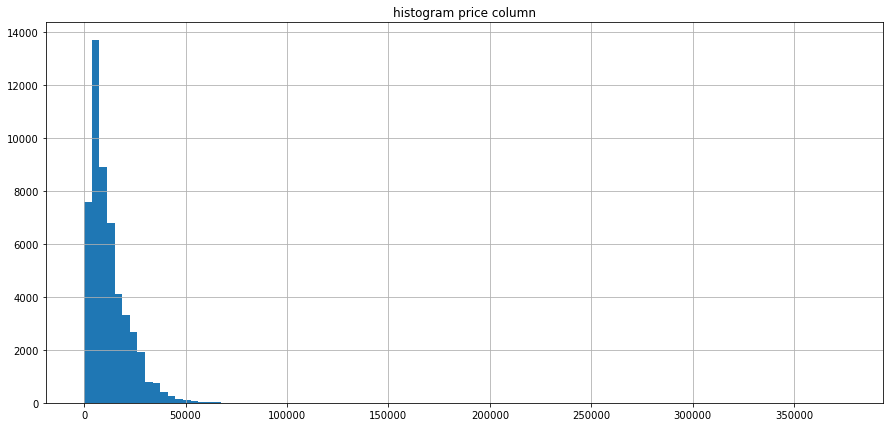

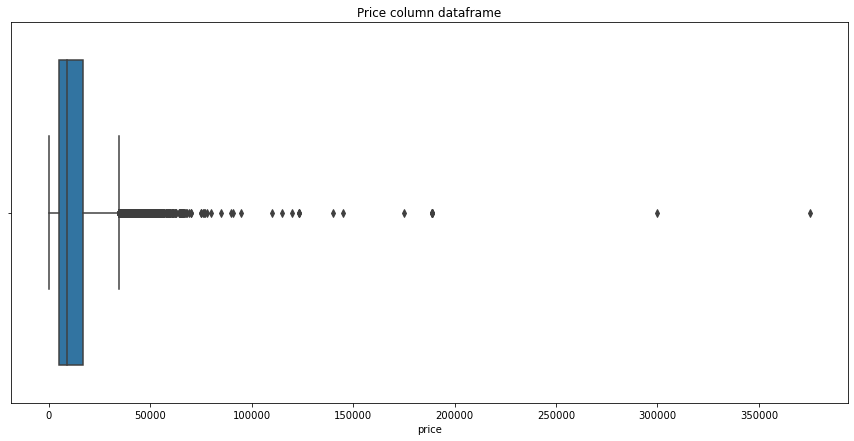

In [80]:
#Membuat histogram dari kolom price
df['price'].hist(figsize=(15,7), bins= 100)
plt.title('histogram price column')
plt.show()

#Membuat boxplot dari kolom 'price' 
plt.figure(figsize= (15,7))
sns.boxplot(data=df , x='price')
plt.title('Price column dataframe')
plt.show()



*Dengan membandingkan 2 plot, histogram memperlihatkan banyaknya pembelian truck dan jika di bandingkan dengan boxplot dataframe price column terlihat pembelian truck dengan penumpukan sampai 65000 dan memperlihatkan adanya outlier dengan harga 350000 lebih*

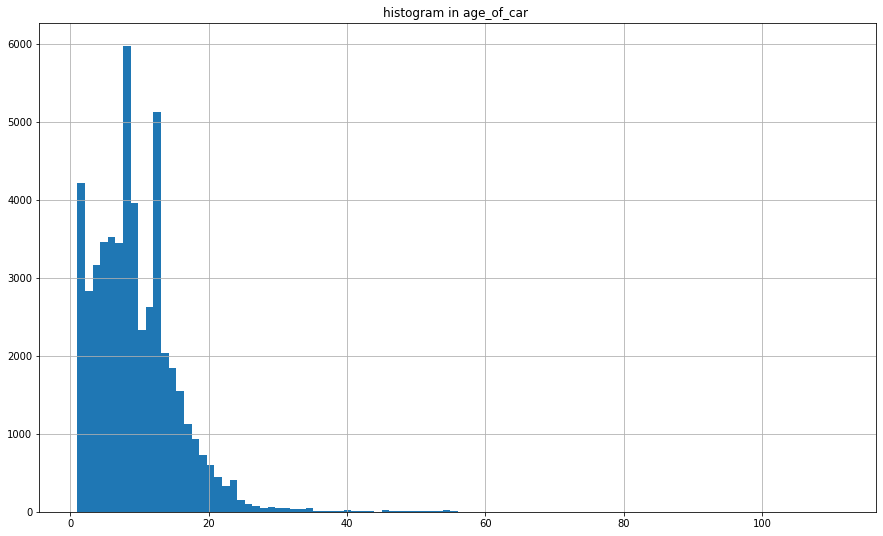

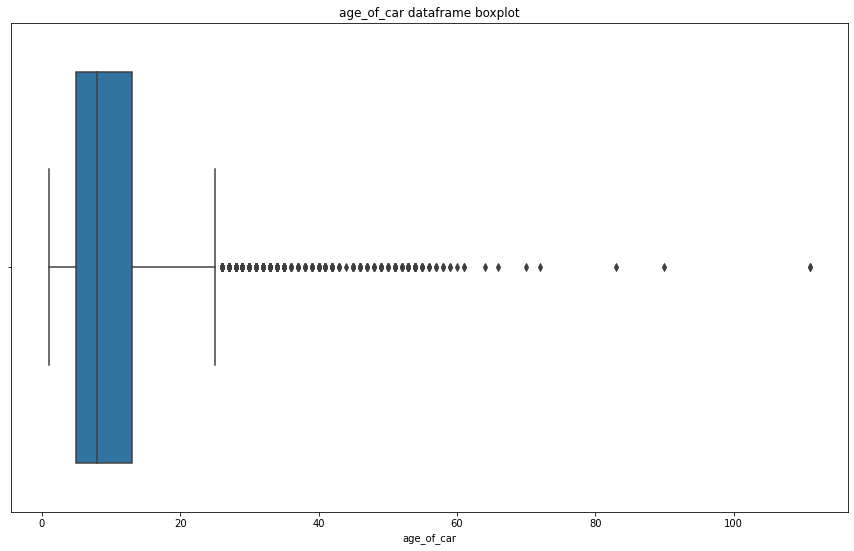

In [69]:
#Membuat histogram age_of_car 
df['age_of_car'].hist(bins= 100, figsize= (15,9))
plt.title('histogram in age_of_car ')
plt.show()

# Membuat boxplot age_of_size
plt.figure(figsize= (15,9))
sns.boxplot(data=df , x='age_of_car')
plt.title('age_of_car dataframe boxplot')
plt.show()



*Jika di lihat dari boxplot dan histogram yang tersedia, terlihat age_of_car banyak yang mendekati angka 0. hal ini memberikan kesimpulan banyak yang menjual mobil baru. dan terdapat outlier yang bisa jadi merupakan mobil classic*

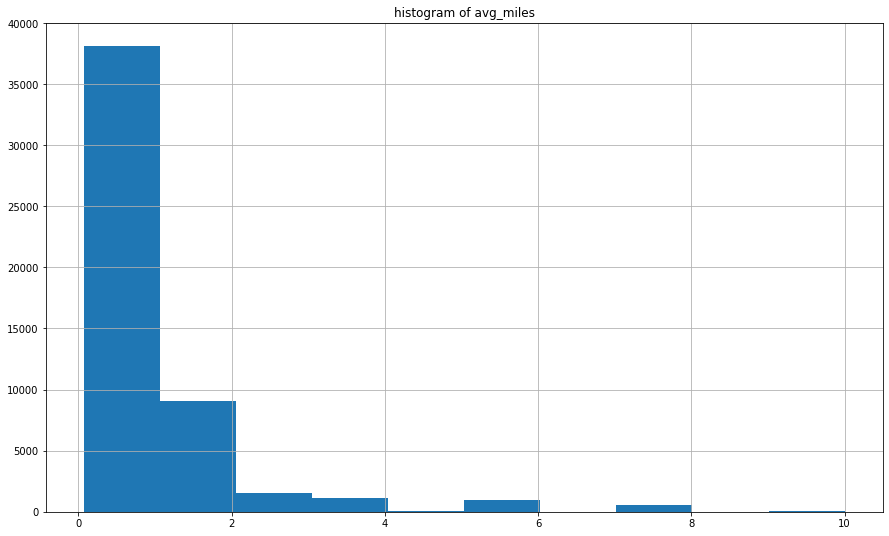

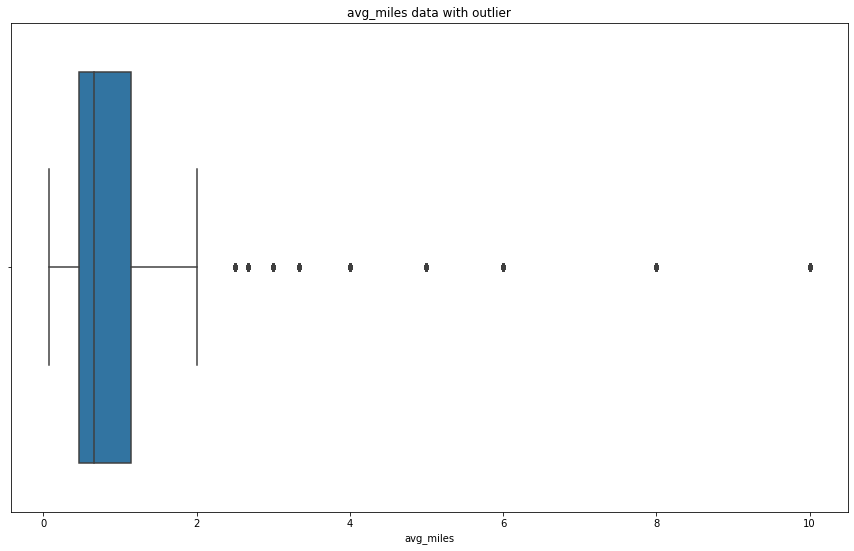

In [70]:
# jarak tempuh terlihat di odomater menggunakan histogram
df['avg_miles'].hist(figsize= (15,9))
plt.title('histogram of avg_miles')
plt.show()

#melihat kolom Jarak tempuh dengan boxplot
plt.figure(figsize= (15,9))
sns.boxplot(data=df , x='avg_miles')
plt.title('avg_miles data with outlier')
plt.show()



*Pada histogram untuk jarak tempuh terdapat keganjilan dimana jumlah data di sumbu x dimana banyak mobil baru yang ingin di jual dan di iklankan, pada boxplot juga terlihat semakin jelas ketika banyak data yang mendekati 0 dan terus mengarah ke kanan menjadi outlier, di karenakan banyak mobil classic yang juga sering digunakan*

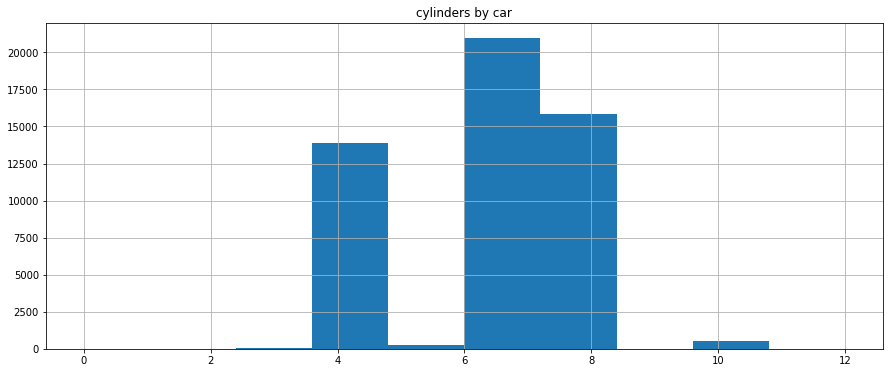

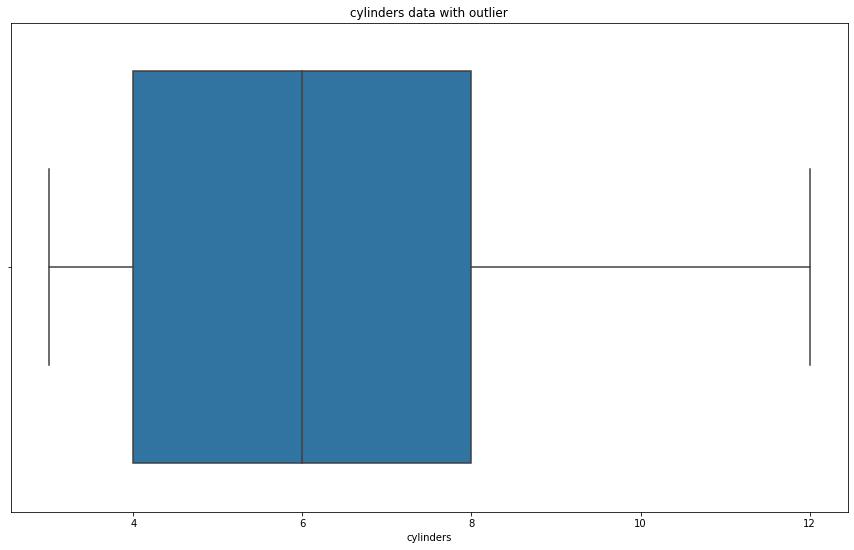

In [71]:
# Histogram cylynders 
df.hist('cylinders', bins=10, figsize= (15,6), range=(0,12))
plt.title('cylinders by car')
plt.show()

#melihat kolom cylinders dengan boxplot
plt.figure(figsize= (15,9))
sns.boxplot(data=df , x='cylinders')
plt.title('cylinders data with outlier')
plt.show()



*dengan histogram terlihat cylynders kebanyakan ada 6,dan 8 sama seperti dengan boxplot yang memperlihatkan hal yang serupa. Akan tetapi tidak memperlihatkan outlier di karenakan jumlah data yang minim, dan mungkin hanya bisa di lihat dari histogram*

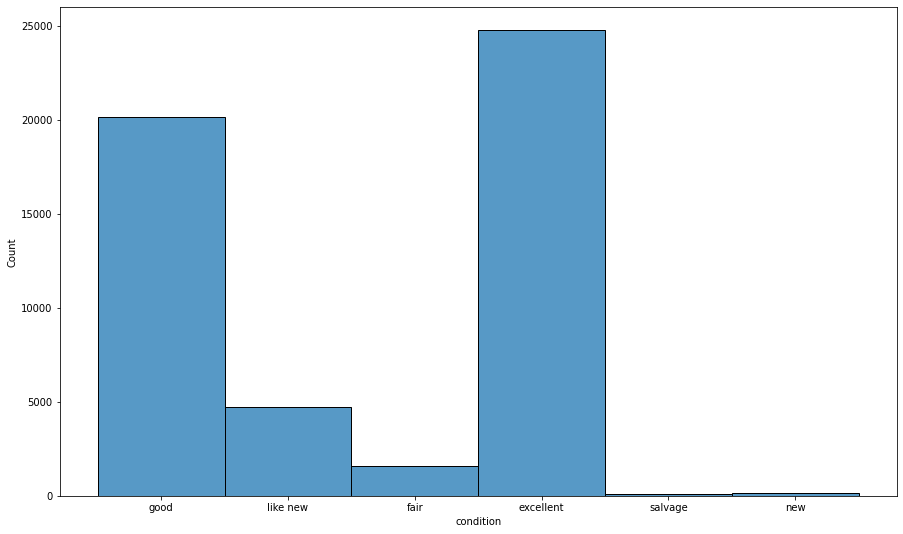

In [72]:
#condition
plt.figure(figsize=(15,9))
sns.histplot(data=df, x="condition")
plt.show()



*Lebih dari 15000 mobil dengan kondisi 'good'dan 'excellent' mempunyai kecenderungan untuk selalu di iklankan. hal ini mempunyai korelasi dengan kecenderungan daya beli*

## Mempelajari dan Menangani Outlier

[Dengan hasil di atas, tentukan kolom apa yang mungkin berisi *outlier*, dan buatlah sebuah DataFrame tanpa *outlier* tersebut. Petunjuk: *Outlier* dapat diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal.]

In [81]:
#menentukan paramater untuk membatas atas dan bawah outlier dengan membuat fungsi

def remove_outlier_IQR(data, col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    data_new = data[~((data[col] < (Q1 - 1.5*IQR)) | (data[col] > (Q3 + 1.5*IQR)))]
    return data_new

In [82]:
# Melakukan pemisahan outlier 
data_for_price = remove_outlier_IQR(data= df, col= 'price')
data_for_odometer = remove_outlier_IQR(data= df, col= 'odometer')
data_for_age_of_car = remove_outlier_IQR(data= df, col= 'age_of_car')


## Mempelajari Parameter Inti Tanpa Outlier

[Gunakan data yang telah difilter untuk membuat grafik baru. Bandingkan dengan data sebelumnya (yang berisi *outlier*). Tarik kesimpulan masing-masing.]

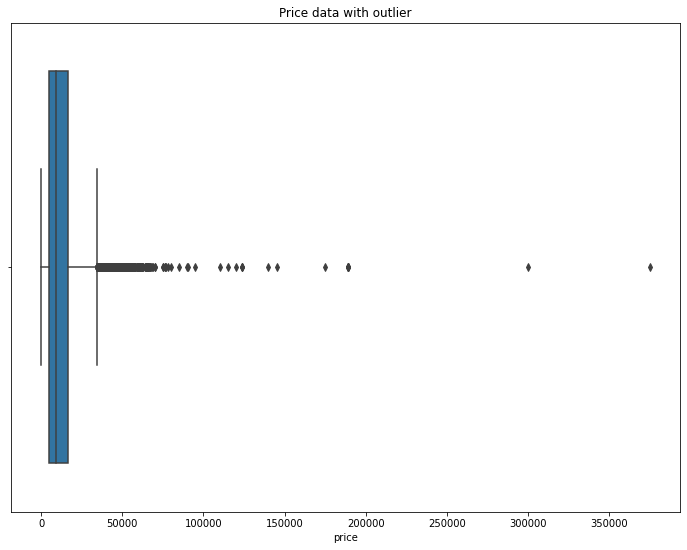

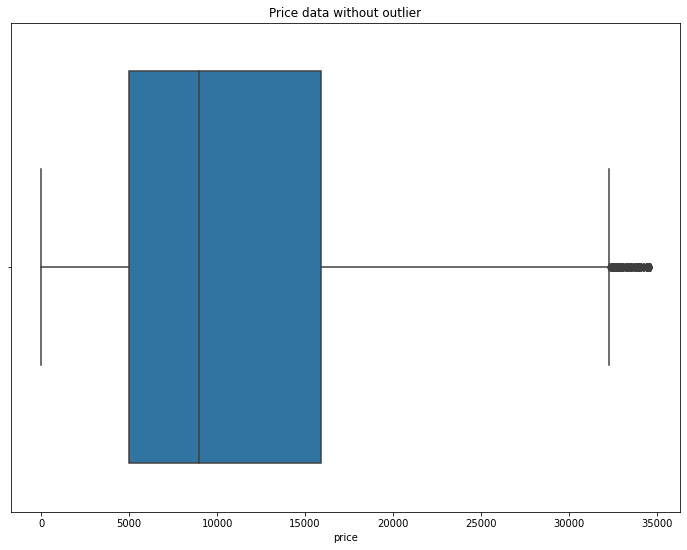

In [75]:
#Membuat perbandingan kolom 'price' dengan dan tidak menggunakan outlier

plt.figure(figsize= (12,9))
sns.boxplot(data=df , x='price')
plt.title('Price data with outlier')
plt.show()

plt.figure(figsize= (12,9))
sns.boxplot(data=data_for_price , x='price')
plt.title('Price data without outlier')
plt.show()


*Perbedaan data di lihat pada Q1,Q2,Q3,dan IQR setelah melakukan perkalian dengan 1.5 dengen data yang sudan di filter*

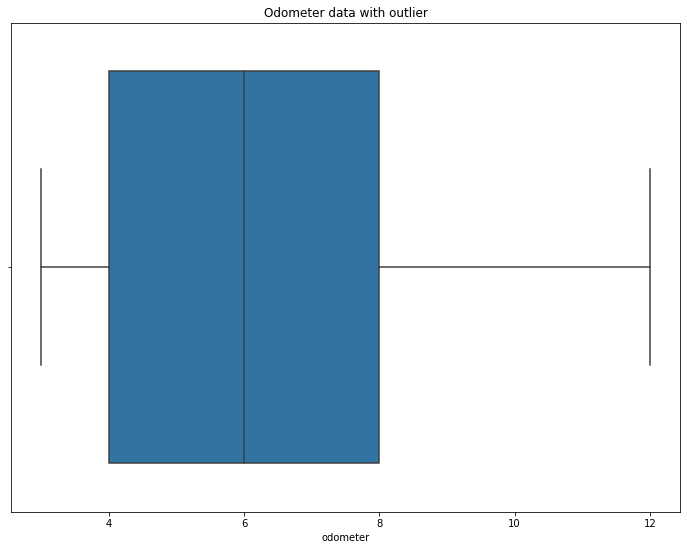

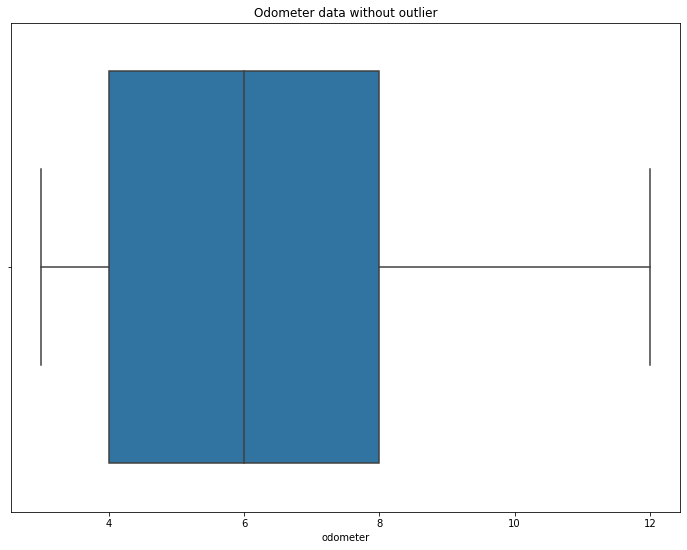

In [76]:
#membandingkan kolom odometer dengan outlier dan tanpa outlier menggunakan boxplot

plt.figure(figsize= (12,9))
sns.boxplot(data=df , x='odometer')
plt.title('Odometer data with outlier')
plt.show()

plt.figure(figsize= (12,9))
sns.boxplot(data=data_for_odometer , x='odometer')
plt.title('Odometer data without outlier')
plt.show()

*Perbandingan odomater dengan tidak adanya outlier terlihat dari range sumbu y yang mengalami penyesuaian dengan metode filter yang di lakukan*

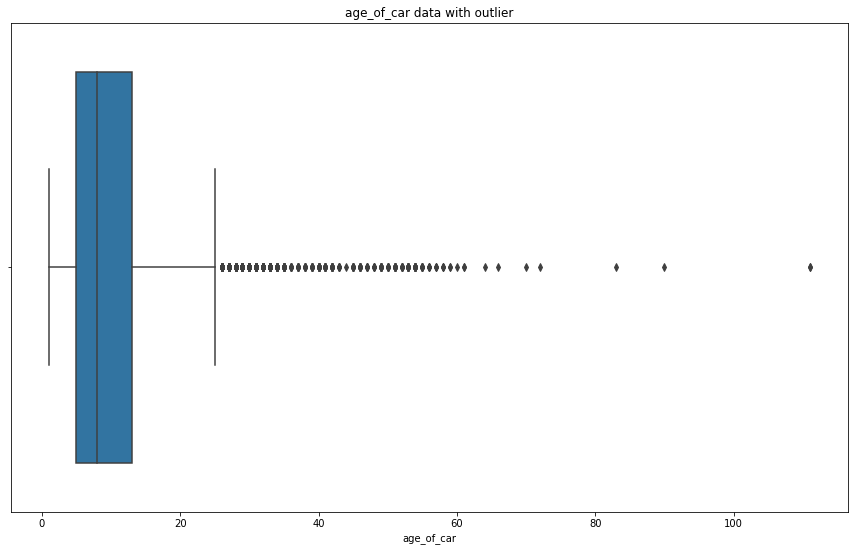

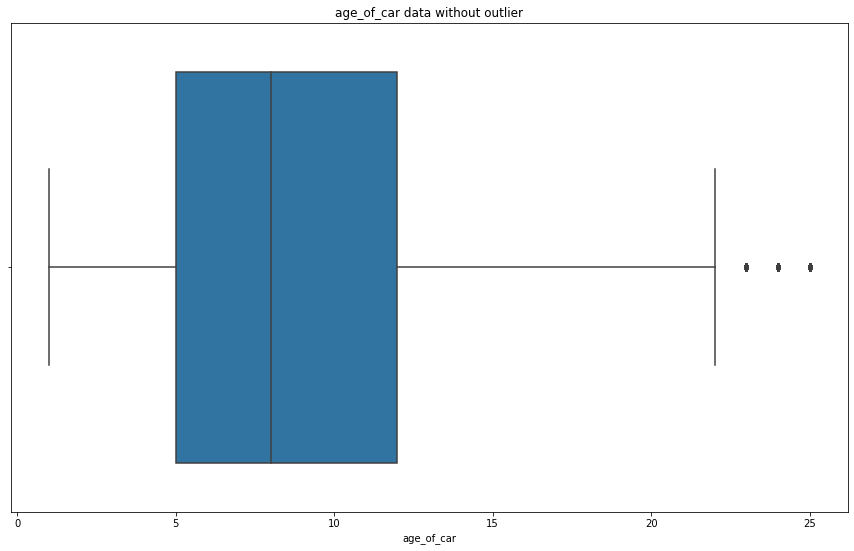

In [77]:
# Kolom jarak tempuh yang di berikan perbedaan yang tadinya memiliki Nilai outlier mencapai 990000 Semarang menjadi 250000. Hal ini adalah penyesuaian jarak tempuh maksimal

plt.figure(figsize= (15,9))
sns.boxplot(data=df , x='age_of_car')
plt.title('age_of_car data with outlier')
plt.show()

plt.figure(figsize= (15,9))
sns.boxplot(data=data_for_age_of_car , x='age_of_car')
plt.title('age_of_car data without outlier')
plt.show()



*Perbedaan dapat di lihat dari quartil dan interquartil secara menyeluruh dengan hasil dari metode filter yang di terapkan. Di tambah lagi adanya penyesuaian outlier dari 990000 menjadi 250000*

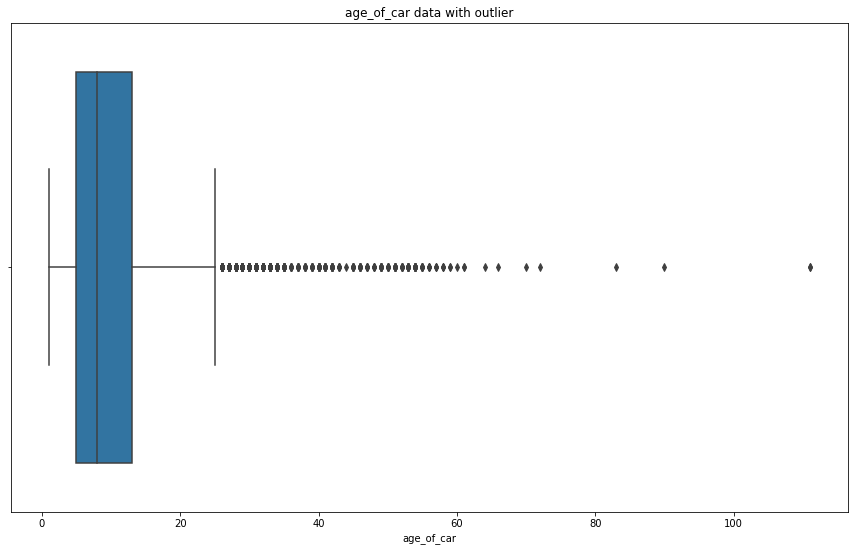

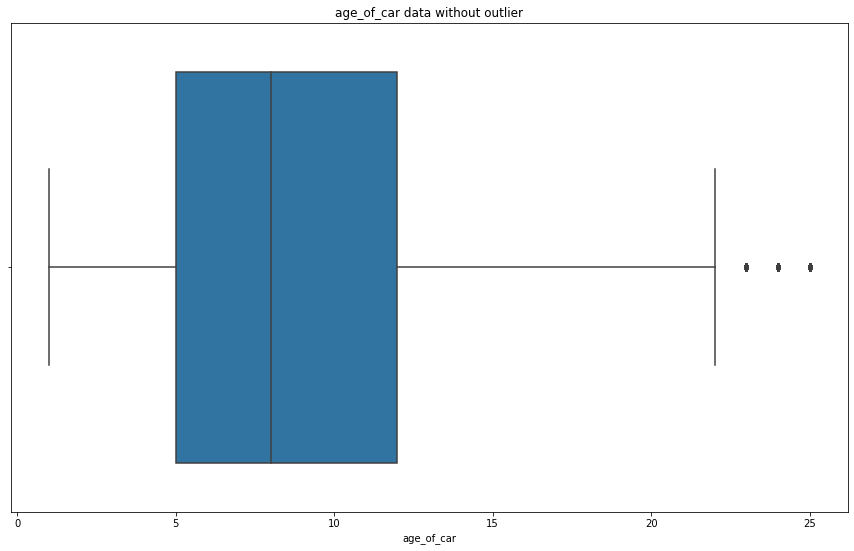

In [78]:
# Memperlihatkan perbandingan usia kendaraan age_of_cars dengan menggunakan boxplot dengan dan tanpa outlier

plt.figure(figsize= (15,9))
sns.boxplot(data=df , x='age_of_car')
plt.title('age_of_car data with outlier')
plt.show()

plt.figure(figsize= (15,9))
sns.boxplot(data=data_for_age_of_car , x='age_of_car')
plt.title('age_of_car data without outlier')
plt.show()

*Dengan melihat kolom usia kendaraan pun sudah terlihat dengan jelas perbedaan dengan adanya penyesuaian maksimal outlier dari 100 tahun ke 25 tahun*

## Masa Berlaku Iklan


In [79]:
# Melakukan pengembalian tipe data menjadi integer untuk pembuatan histogram
df['days_listed'] = df['days_listed'].dt.days.astype(int)

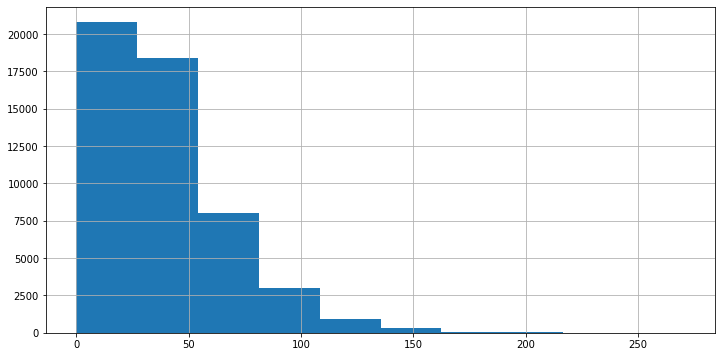

In [80]:
# memperlihatkan histogram days_listed untuk dapat melakukan analysa
df['days_listed'].hist(bins= 10, figsize= (12,6))
plt.show()

In [81]:
# melakuakn pengecekan distribusi varibale yanga ada di kolom days_listed
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

In [82]:
df.loc[df['days_listed'] == 0, 'type'].value_counts()

truck          14
sedan          13
SUV             8
pickup          6
hatchback       4
van             3
coupe           3
mini-van        2
convertible     1
Name: type, dtype: int64

In [83]:
df.loc[df['days_listed'] == 271]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,months,years,last_listed,age_of_car,avg_miles,scale_of_condition
4360,5200,2011,chevrolet impala,like new,6,gas,6.0,automatic,sedan,others,0,2018-05-24,271,3,5,2018,2019-02-19,8,0.75,3


**Dengan menggunakan metode describe di atas, bisa di ketahui bahwa iklan tercepat dan iklan terlama yang di tayangkan**

1. iklan tercepat jatuh kepada 0 hari, bisa jadi karena iklan tersebut di tarik setelah di tayangkan atau memang mobil sudah laku dengan cepat 

2. Iklan terlama jatuh kepada 271 hari yang merupakan hanya 1 iklan chevrolet impala, yang mungkin jarang di minati

3. Truck, sedan, dan SUV merupakan mobil yang paling sering di iklankan, hal ini mungkin karena ke dua tipe mobil itu paling di minati dan laku di situs ini


## Harga Rata-Rata Setiap Jenis Kendaraan

In [83]:
#Membuat pivot table untuk memberikan rata rata jumlah kendaraan berdasarkan tipe yang akan di jual 

data_pivot = data_for_price.pivot_table(index='type',values= 'price', 
                                        aggfunc=['median', 'mean', 'count']).reset_index()

data_pivot.columns = ['type', 'median_price', 'mean_price', 'count']
data_pivot.sort_values('count',ascending=False)

,type,median_price,mean_price,count
9,sedan,5995.0,6942.349551,12147
0,SUV,8500.0,10359.897968,12104
10,truck,14000.0,14820.840606,11550
8,pickup,13500.0,14609.742072,6622
3,coupe,11999.0,13269.010782,2226
12,wagon,7896.0,8880.496408,1531
5,mini-van,6495.0,8004.687986,1157
4,hatchback,5977.5,6841.620459,1046
11,van,7495.0,8743.340102,591
2,convertible,11000.0,12511.617021,423


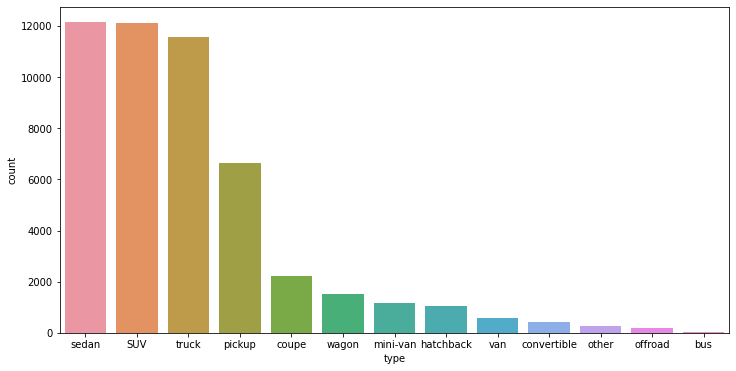

In [85]:
#Membuat histogram yang memperlihatkan jumlah dari setiap jenis kendaraan 
plt.figure(figsize=(12,6))
sns.barplot(data=data_pivot, x='type', y='count',
            order=data_pivot.sort_values('count', ascending=False).type)
plt.show()

*Dengan membuat histogram dapat lebih cepat mengambil kesimpulan sedan merupakan kendaraan yang paling banyak di iklankan, ke dua merupakan SUV lalu truck. Seterusnya mengalami penurunan di pick up dan lebih drastis lagi di coupe, lalu secara berangsur sampán pada bus yang merupakan kendaraan yang paling sedikit di iklankan.*

## Faktor Harga

[Apakah faktor yang paling memengaruhi harga kendaraan? Ambil masing-masing jenis kendaraan populer yang Anda temukan pada tahap sebelumnya dan pelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Buatlah grafik *boxplot* untuk variabel kategorik (jenis transmisi dan warna), lalu buatlah *scatterplot* untuk sisanya. Ketika menganalisis variabel kategorik, ingatlah bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.]

[Manfaatkan matriks korelasi dan plot korelasi]

In [86]:
#membuat dataFrame yang hanya berisi 2 jenis kendaraan paling populer
data_corr = df[['type', 'price', 'age_of_car', 'odometer', 'scale_of_condition',
                'transmission', 'paint_color']].query("type == ['sedan', 'SUV']")
data_corr.head()

,type,price,age_of_car,odometer,scale_of_condition,transmission,paint_color
0,SUV,9400,8,6.0,4,automatic,others
2,sedan,5500,7,4.0,3,automatic,red
4,sedan,14900,3,4.0,5,automatic,black
5,sedan,14990,5,6.0,5,automatic,black
6,sedan,12990,4,4.0,5,automatic,white


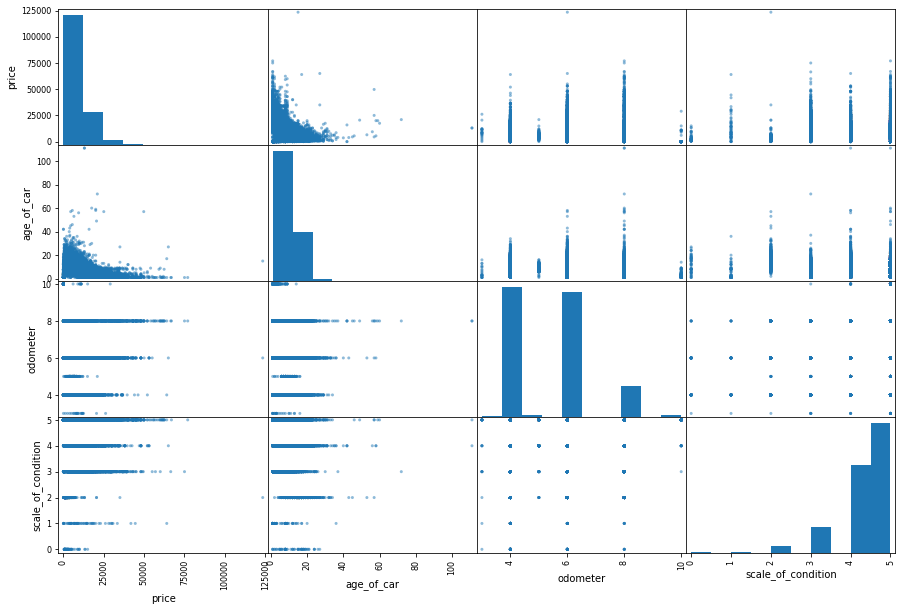

In [87]:
#Membuat scatter plot matrix untuk memberikan untuk dapat melihat penyebaran data yang sudah di filter
pd.plotting.scatter_matrix(data_corr, figsize = (15,10))
plt.show()

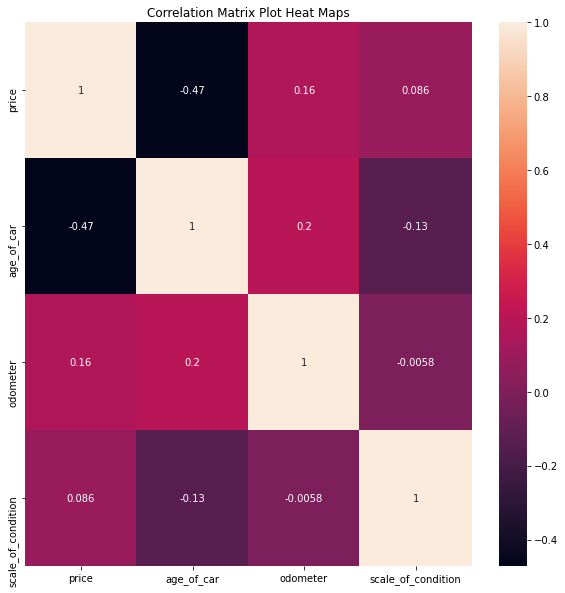

In [88]:
# Pembuatan correlation dengan metode heatmap untuk dapat melihat plot yang tersebar dengan di kombinasikan dengan scatter plot bisa melihat distribusi variable lebih mudah untuk menarik kesimpulan sementara
plt.figure(figsize=(10,10))
data_corr.corr()
sns.heatmap(data_corr.corr(), annot=True)
plt.title('Correlation Matrix Plot Heat Maps')
plt.show()

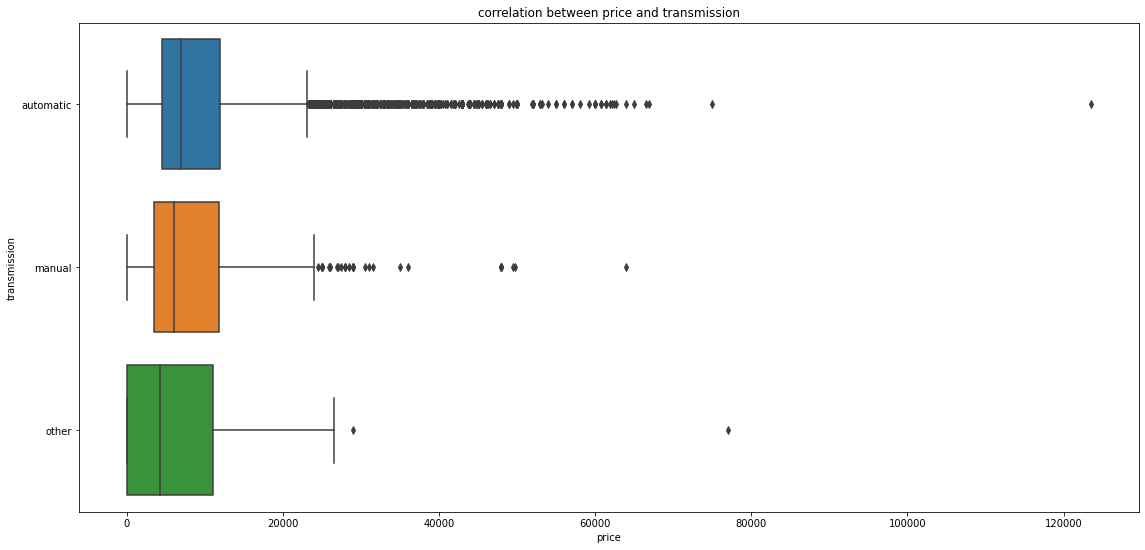

In [89]:
# Membuat boxplot untuk memperlihatkan korelasi antara harga dan transmisi mobil yang bisa di gunakan untuk pengelompokan data 
plt.figure(figsize= (19,9))
sns.boxplot(data=data_corr , x='price', y='transmission')
plt.title('correlation between price and transmission')
plt.show()

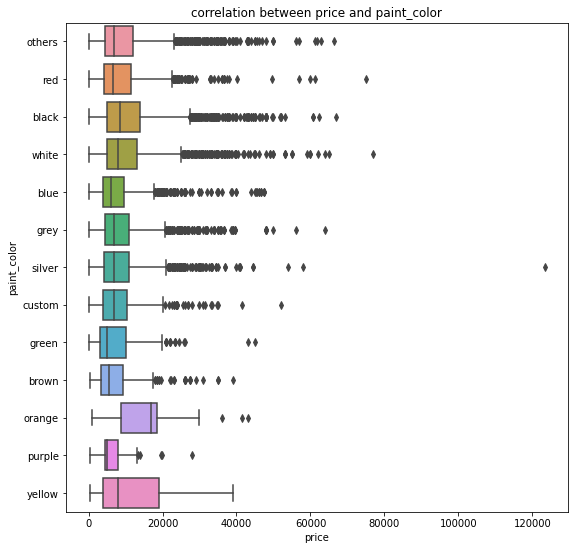

In [90]:
#Membuat boxplot untuk mengambil kesimpulan korelasi harga mobil dan warna mobil
plt.figure(figsize= (9,9))
sns.boxplot(data=data_corr , x='price', y='paint_color')
plt.title('correlation between price and paint_color')
plt.show()

<div class="alert alert-danger">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Sebelum membahas terkait analisa yang dilakukan coba pastikan bahwa jumlah iklan pada kategori yang digunakan paling tidak sebanyak 50 iklan sesuai dengan ketentuan yang ada pada brief project ini.

<div class="alert alert-block alert-info">
<b> Mohon berikan bimbingan untuk apa yang haruds di lakukan untuk revisi yang kak naufal inginkan. akan sangat baik untuk pembelajaran saya ?
sebelumnya saya ucapkan terima kasih.
</b> <a class="tocSkip"></a>
</div>

In [91]:
data_corr['transmission'].value_counts()

automatic    23156
manual        1111
other          292
Name: transmission, dtype: int64

**Bisa di lihat dari kategori transmission iklan yang di siarkan lebih dari 50. Dengan di hitung dari kolom sesuai dengan transmission**

In [92]:
data_corr['paint_color'].value_counts()

others    4425
black     3990
silver    3614
white     3472
grey      2806
blue      2286
red       1851
green      645
brown      628
custom     611
orange      93
yellow      73
purple      65
Name: paint_color, dtype: int64

# Kesimpulan dari grafik-grafik diatas:

*Kesimplulan pengelompokan faktor faktor yang mempengaruhi mmenggunakan grafik*

*1. Korelasi harga dan usia kendaraan di lihat dari ketergantungannya menggunakan scatter matrix memperlihatkan usia kendaraan sangat mempengaruhi harga untuk penjualan mobil untuk yang bisa melakukan pemilihan untuk di iklankan.*

*2. Harga dan jarak tempuh juga memiliki korelasi dimana bisa di ilihat untuk di iklankan atau tidak, berbeda dengan korelasi usia kendaraan yang lebih significant Mika di kelompokan datanya untuk bisa di presentasikan.*

*3. Memberikan filter untuk kondisi kendaraan memberikan kemudahan untuk membuat korelasi dengan 2 point dilihat dari korelasi positif sebanyak 0.086 yang mempunyai arti semakin bagus kondisi kendaraan maka semakin bagus harga dan kecenderungan untuk di iklankan kendaraannya.*

*4. Korelasi harga dengan tipe transmisi bisa menyimpulkan rata rata harga tipe automatic di Jual lebih tinggi bisa mencapai 120000. Sedangkan transmisi manual tidak sebanyak automatic yang terjual jika di iklankan.*

*5. Korelasi harga dan warna  mempunyai variable data yang banyak Tanya ada 1 yang merupakan outlier di wanna silver mencapai 120000 lebih memiliki, dan white lalu merah. Walaupun tergolong lebih banyak.*

## Kesimpulan Umum
[Tuliskan kesimpulan penting Anda di bagian akhir ini, pastikan kesimpulan tersebut menyertakan kesimpulan yang menjelaskan cara Anda memproses dan menganalisis data. Laporkan nilai yang hilang, duplikat, *outlier*, dan kemungkinan alasan serta solusi untuk permasalahan yang harus Anda tangani. Jangan lupa untuk menghapus semua komentar dalam tanda kurung sebelum mengirimkan proyek Anda.]

*- Mengolah data mengenai kendaraan harus mengerti kendaraan tersebut.*

*- oleh Karena itu variable data yang tersedia pasti menunjukan hubungan antara harga mobil dan kecenderungan untuk di iklankan.*

*- Melakukan eksplorasi untuk melihat dan meiihat data yang memiliki. berbagai variable yang mempengaruhi faktor penjualan ataupun di iklankan*

*- Faktor faktor yang bisa di olah atau manipulasi dengan data merupakan hal yang menjadi pekerjaan seorang data analysis untuk bisa mempresentasikan dengan jelas.*

*- Pembuatan table baru untuk dapat mengelompokan dan moengolah nilai yang hilang sebagai proses untuk mengetahui faktor dari harga mobil. Faktor yang di lihat dari.*

*1. Model_year*
*2. Cylinders*
*3. Odometer*
*4. paint_colour*
*5. is_4wd*


*- Faktor yang bisa di jadikan paramater untuk analysis lebih lancet dengan menggunakan graphic*

*- Bisa di gaditan sebagai analis lebih menyeluruh sebagai bántuk eksplorasi data*

*- Bisa embuât kesimpulan untuk membuat hipotesis untuk pengambilan keputusan di iklankan atau tirai dari perhitungan berdasarkan faktor yang Sudan di sebutkan*
